In [ ]:
#Load data from google drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

!unzip Cam101.zip

%cd Cam101

import os

train_folder = "train"
test_folder = "test"

#Get a list of all files in the train and test folders
train_list = os.listdir(train_folder)
test_list = os.listdir(test_folder)

#Count the number of image files
train_images = len([file for file in train_list if file.endswith(".png")])
test_images = len([file for file in test_list if file.endswith(".png")])

#Print the number of images
print(f"There are {train_images} images in the train folder.")
print(f"There are {test_images} images in the train folder.")


Mounted at /content/drive
/content/drive/MyDrive
Archive:  Cam101.zip
replace Cam101/label_colors.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
/content/drive/MyDrive/Cam101
There are 180 images in the train folder.
There are 22 images in the train folder.


There are 180 images in the train folder.
Number of train images: 90
Number of train labels: 90
Number of test images: 11
Number of test labels: 11


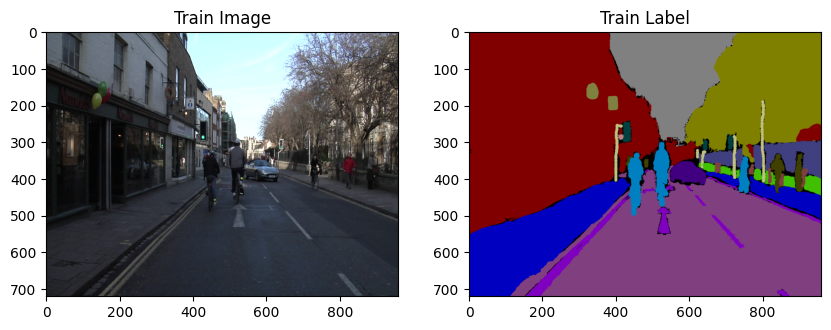

In [ ]:
#Split the data into original and labelled images

import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

train_folder = "train"
test_folder = "test"

train_list = os.listdir(train_folder)
train_images = len([file for file in train_list if file.endswith(".png")])
print(f"There are {train_images} images in the train folder.")

train_image_folder = "train_images"
train_label_folder = "train_labels"
test_image_folder = "test_images"
test_label_folder = "test_labels"

#Remove any existing contents of directories
if os.path.exists(train_image_folder):
    shutil.rmtree(train_image_folder)

if os.path.exists(train_label_folder):
    shutil.rmtree(train_label_folder)

if os.path.exists(test_image_folder):
    shutil.rmtree(test_image_folder)

if os.path.exists(test_label_folder):
    shutil.rmtree(test_label_folder)

    
#Create directories to store the split data
os.makedirs(train_image_folder, exist_ok=True)
os.makedirs(train_label_folder, exist_ok=True)
os.makedirs(test_image_folder, exist_ok=True)
os.makedirs(test_label_folder, exist_ok=True)

#Split the train images and labels into separate folders
for filename in os.listdir(os.path.join(train_folder)):
    if filename.endswith(".png"):
        if filename.endswith("_L.png"):
            shutil.copy(os.path.join(train_folder, filename), os.path.join(train_label_folder, filename))
        else:
            shutil.copy(os.path.join(train_folder, filename), os.path.join(train_image_folder, filename))

#Split the test images and labels into separate folders
for filename in os.listdir(os.path.join(test_folder)):
    if filename.endswith(".png"):
        if filename.endswith("_L.png"):
            shutil.copy(os.path.join(test_folder, filename), os.path.join(test_label_folder, filename))
        else:
            shutil.copy(os.path.join(test_folder, filename), os.path.join(test_image_folder, filename))


train_images_list = os.listdir(train_image_folder)
train_labels_list = os.listdir(train_label_folder)
test_images_list = os.listdir(test_image_folder)
test_labels_list = os.listdir(test_label_folder)

#Check there are the correct number of images in each folder
print("Number of train images:", len(train_images_list))
print("Number of train labels:", len(train_labels_list))
print("Number of test images:", len(test_images_list))
print("Number of test labels:", len(test_labels_list))

#Select a random image to display
index = np.random.randint(len(train_images_list))

#Load the train and train label images
train_image = Image.open(os.path.join(train_image_folder, train_images_list[index]))
train_label = Image.open(os.path.join(train_label_folder, train_labels_list[index]))

#Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(train_image)
axes[0].set_title("Train Image")
axes[1].imshow(train_label)
axes[1].set_title("Train Label")
plt.show()

450 450


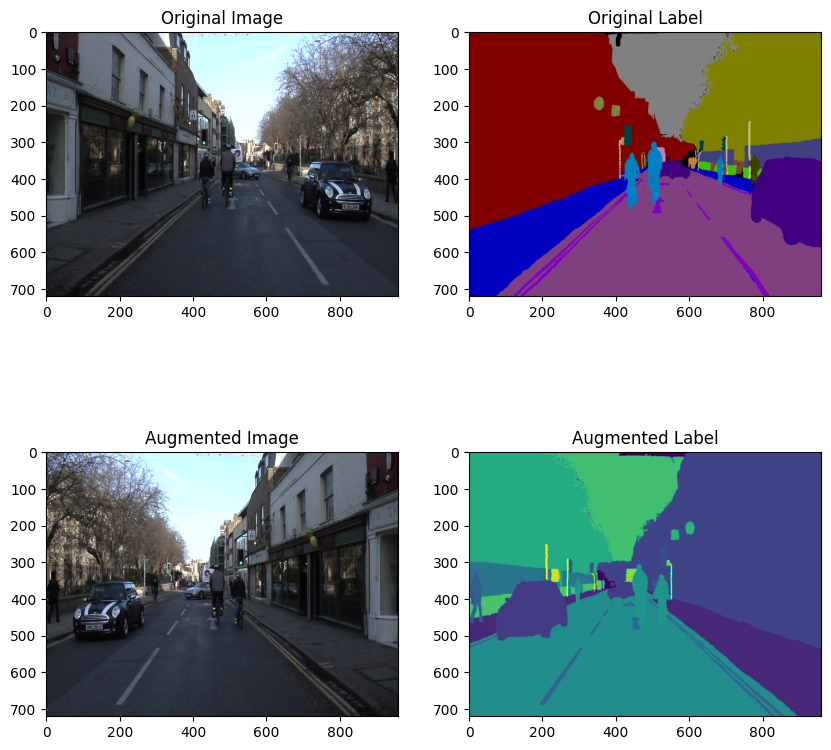

In [ ]:
#Apply augmentation

import cv2
from skimage import transform
from skimage.util import random_noise


#Define augmentation functions
def flip_lr(image):
    if image is not None:
        return cv2.flip(image, 1)
    else:
        return None

def rotate_90(image):
    if image is not None:
        return transform.rotate(image, angle=90, preserve_range=True).astype('uint8')
    else:
        return None

def add_noise(image):
    if image is not None:
        return (random_noise(image)*255).astype('uint8')
    else:
        return None

#Augment images and save
for image_file in train_images_list:
    #Load image
    image_path = os.path.join(train_image_folder, image_file)
    image = cv2.imread(image_path)

    #Apply augmentations
    augmented_images = [image, flip_lr(image), rotate_90(image), add_noise(image)]

    #Get corresponding segmented image and apply same augmentations
    label_file = image_file.split(".")[0] + "_L.png"
    label_path = os.path.join(train_label_folder, label_file)
    label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
    augmented_labels = [label, flip_lr(label), rotate_90(label), add_noise(label)]

    #Save augmented images and labels
    for i, (aug_image, aug_label) in enumerate(zip(augmented_images, augmented_labels)):
        if aug_image is not None:
            new_image_file = f"{image_file.split('.')[0]}_aug{i}.png"
            cv2.imwrite(os.path.join(train_image_folder, new_image_file), aug_image)
        if aug_label is not None:
            new_label_file = f"{label_file.split('.')[0]}_aug{i}_L.png"
            cv2.imwrite(os.path.join(train_label_folder, new_label_file), aug_label)

train_images_list = os.listdir(train_image_folder)
train_labels_list = os.listdir(train_label_folder)


#Compare an image to the augmented version
image = plt.imread(os.path.join(train_image_folder, "0016E5_07961.png"))
image_index = train_images_list.index("0016E5_07961.png")
imageLabel = plt.imread(os.path.join(train_label_folder, train_labels_list[image_index]))
augmentedImage = plt.imread(os.path.join(train_image_folder, "0016E5_07961_aug1.png"))
augmentedImage_index = train_images_list.index("0016E5_07961_aug1.png")
augmentedImageLabel = plt.imread(os.path.join(train_label_folder, train_labels_list[augmentedImage_index]))

#Display the images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(image)
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(imageLabel)
axes[0, 1].set_title("Original Label")
axes[1, 0].imshow(augmentedImage)
axes[1, 0].set_title("Augmented Image")
axes[1, 1].imshow(augmentedImageLabel)
axes[1, 1].set_title("Augmented Label")
plt.show()


In [ ]:
#Preprocess the images and split the data into training and validation

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from sklearn.model_selection import train_test_split
import torchvision.models as models
import torch.utils.data as data




img_size = (256, 256)  #input image size
batch_size = 16

def load_data(image_dir, label_dir, val_split=0.1):
    image_filenames = os.listdir(train_image_folder)
    label_filenames = os.listdir(train_label_folder)
    image_paths = [os.path.join(image_dir, filename) for filename in image_filenames]
    label_paths = [os.path.join(label_dir, filename) for filename in label_filenames]
    X_train, X_val, y_train, y_val = train_test_split(image_paths, label_paths, test_size=val_split, random_state=42)
    return X_train, y_train, X_val, y_val


#Split the data into training and validation
X_train, y_train, X_val, y_val = load_data(train_image_folder, train_label_folder, val_split=0.1)

image_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

label_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor()
])

label_map = {(64, 128, 64): 0,
             (192, 0, 128): 1,
             (0, 128, 192): 2,
             (0, 128, 64): 3,
             (128, 0, 0): 4,
             (64, 0, 128): 5,
             (64, 0, 192): 6,
             (192, 128, 64): 7,
             (192, 192, 128): 8,
             (64, 64, 128): 9,
             (128, 0, 192): 10,
             (192, 0, 64): 11,
             (128, 128, 64): 12,
             (192, 0, 192): 13,
             (128, 64, 64): 14,
             (64, 192, 128): 15,
             (64, 64, 0): 16,
             (128, 64, 128): 17,
             (128, 128, 192): 18,
             (0, 0, 192): 19,
             (192, 128, 128): 20,
             (128, 128, 128): 21,
             (64, 128, 192): 22,
             (0, 0, 64): 23,
             (0, 64, 64): 24,
             (192, 64, 128): 25,
             (128, 128, 0): 26,
             (192, 128, 192): 27,
             (64, 0, 64): 28,
             (192, 192, 0): 29,
             (0, 0, 0): 30,
             (64, 192, 0): 31}

#Label encoding
def map_labels(label_image, label_map):
    label_image = label_image.convert('RGB')
    label_data = np.array(label_image)
    label_data = label_data[:, :, ::-1].copy()  #Convert RGB to BGR
    for rgb, label in label_map.items():
        mask = (label_data == np.array(rgb)).all(axis=2)
        label_data[mask] = label
    label_data = label_data.astype(np.uint8)
    label_image = Image.fromarray(label_data)
    label_image = label_image.convert('L')  #Convert back to grayscale
    return label_image

#Normalise and resize each image
def apply_transforms(image_path, label_path, label_map):
    image = Image.open(image_path)
    label = Image.open(label_path)
    label = map_labels(label, label_map)  #Map the labels
    label = label_transforms(label)
    image = image_transforms(image)
    return image, label

#Create the datasets
train_dataset = [(apply_transforms(X_train[i], y_train[i], label_map)) for i in range(len(X_train))]
val_dataset = [(apply_transforms(X_val[i], y_val[i], label_map)) for i in range(len(X_val))]
test_dataset = [(apply_transforms("test/"+test_images_list[i], "test/"+test_labels_list[i], label_map)) for i in range(len(test_images_list))]

#Create the training, validation and testing dataloaders
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

450 450 11 11


In [ ]:
###FCN###

#Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Build the model
class FCN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        resnet = models.resnet50(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-2])
        self.conv1 = nn.Conv2d(2048, 512, kernel_size=1)
        self.bn1 = nn.BatchNorm2d(512)
        self.conv2 = nn.Conv2d(512, num_classes, kernel_size=1)
        self.relu = nn.ReLU(inplace=True)
        self.upsample = nn.Upsample(scale_factor=32, mode='bilinear', align_corners=True)

    def forward(self, x):
        x = self.features(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.upsample(x)
        return x

num_classes = 32
model = FCN(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 205MB/s]


In [ ]:
#Define the functions for training

from sklearn.metrics import jaccard_score

def pixel_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct_pixels = torch.sum(predicted == labels)
    total_pixels = labels.numel()
    accuracy = float(correct_pixels) / float(total_pixels)
    return accuracy


def train(model, train_dataloader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0
    running_jaccard = 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.squeeze(1).long().to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        accuracy = pixel_accuracy(outputs, labels)
        predictions_flat = outputs.argmax(dim=1).flatten().cpu().numpy()
        labels_flat = labels.flatten().cpu().numpy()
        iou = jaccard_score(labels_flat, predictions_flat, average='micro')
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_accuracy += accuracy
        running_jaccard += iou
    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = running_accuracy / len(train_dataloader)
    epoch_jaccard = running_jaccard / len(train_dataloader)
    return epoch_loss, epoch_accuracy, epoch_jaccard

def validate(model, val_dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_accuracy = 0.0
    running_jaccard = 0.0
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_dataloader):
            images = images.to(device)
            labels = labels.squeeze(1).long().to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            accuracy = pixel_accuracy(outputs, labels)
            predictions_flat = outputs.argmax(dim=1).flatten().cpu().numpy()
            labels_flat = labels.flatten().cpu().numpy()
            iou = jaccard_score(labels_flat, predictions_flat, average='micro')
            running_loss += loss.item()
            running_accuracy += accuracy
            running_jaccard += iou
    epoch_loss = running_loss / len(val_dataloader)
    epoch_accuracy = running_accuracy / len(val_dataloader)
    epoch_jaccard = running_jaccard / len(val_dataloader)
    return epoch_loss, epoch_accuracy, epoch_jaccard

In [ ]:
#Use cross validation to find the best hyperparameters

from sklearn.model_selection import ParameterGrid

#Define the hyperparameters to tune and their possible values
param_grid = {
    'lr': [0.1, 0.01, 0.001],  #learning rate
    'weight_decay': [0.0, 0.1, 0.01],  #weight decay
    'batch_size': [16, 32], #batch
}

#Create a parameter grid
grid = ParameterGrid(param_grid)

best_model = None
best_loss = float('inf')
num_classes = 32
val_losses = []
val_accs = []
val_ious = []
#Iterate over each combination of hyperparameters
for params in grid:
    model = FCN(num_classes)  #Initialize a new model
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
    criterion = nn.CrossEntropyLoss()

    #Update the batch size
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

    n_epochs = 10
    train_losses = []
    train_accs = []
    train_ious = []
    val_losses = []
    val_accs = []
    val_ious = []
    for epoch in range(n_epochs):
        train_loss, train_acc, train_iou = train(model, train_dataloader, optimizer, criterion)
        val_loss, val_acc, val_iou = validate(model, val_dataloader, criterion)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        train_ious.append(train_iou)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_ious.append(val_iou)
        print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train IOU: {train_iou:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val IOU: {val_iou:.4f}")

    #If the new model is better than the previous best, update the best model
    if min(val_losses) < best_loss:
        best_loss = min(val_losses)
        best_model = model
        best_parameters = params

print("Best parameters: ", best_parameters)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.1323, Train Accuracy: 0.9646, Train IOU: 0.9631, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 2/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 3/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 4/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 5/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 6/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 7/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 8/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.2107, Train Accuracy: 0.9628, Train IOU: 0.9622, Val Loss: 0.5906, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 2/10, Train Loss: 0.1206, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0677, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 3/10, Train Loss: 0.1079, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.1141, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 4/10, Train Loss: 0.1044, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.1049, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 5/10, Train Loss: 0.1039, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.1051, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 6/10, Train Loss: 0.1037, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.1037, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 7/10, Train Loss: 0.1036, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.1036, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 8/10, Train Loss: 0.1036, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.1429, Train Accuracy: 0.9617, Train IOU: 0.9616, Val Loss: 0.1217, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 2/10, Train Loss: 0.0040, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0301, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 3/10, Train Loss: 0.0088, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 4/10, Train Loss: 0.0106, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0030, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 5/10, Train Loss: 0.0105, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0140, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 6/10, Train Loss: 0.0097, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0100, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 7/10, Train Loss: 0.0099, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0097, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 8/10, Train Loss: 0.0099, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: ignored

Epoch 1/10, Train Loss: 0.1151, Train Accuracy: 0.9685, Train IOU: 0.9654, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 2/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 3/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 4/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 5/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 6/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 7/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000, Val IOU: 1.0000
Epoch 8/10, Train Loss: 0.0000, Train Accuracy: 1.0000, Train IOU: 1.0000, Val Loss

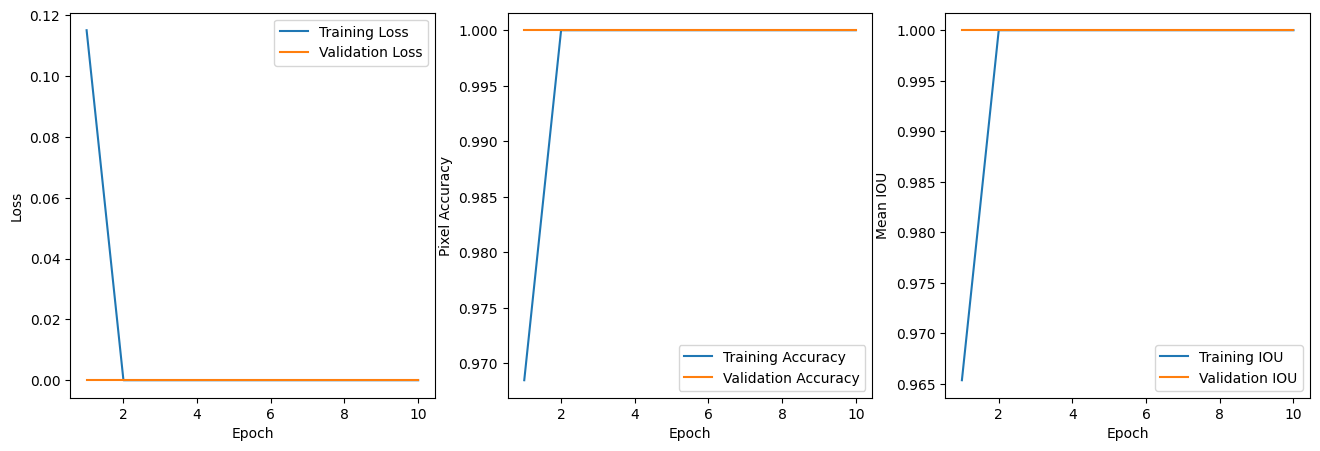

In [ ]:
#Train the model

import time

n_epochs = 10
train_losses = []
train_accs = []
train_ious = []
val_losses = []
val_accs = []
val_ious = []
start_time = time.time() 
for epoch in range(n_epochs):
    train_loss, train_acc, train_iou = train(model, train_dataloader, optimizer, criterion)
    val_loss, val_acc, val_iou = validate(model, val_dataloader, criterion)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    train_ious.append(train_iou)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    val_ious.append(val_iou)
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train IOU: {train_iou:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val IOU: {val_iou:.4f}")
    
end_time = time.time() 
epoch_time = end_time - start_time
print(f"Training time: {epoch_time:.2f}, seconds")

#Plot the losses, accuracies and Jaccard scores
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, n_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, n_epochs+1), train_accs, label="Training Accuracy")
plt.plot(range(1, n_epochs+1), val_accs, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Pixel Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, n_epochs+1), train_ious, label="Training IOU")
plt.plot(range(1, n_epochs+1), val_ious, label="Validation IOU")
plt.xlabel("Epoch")
plt.ylabel("Mean IOU")
plt.legend()

plt.show()


Epoch 1/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 2/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 3/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 4/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 5/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 6/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 7/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 8/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 9/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000
Epoch 10/10, Test Loss: 0.0000, Test Accuracy: 1.0000, Test IOU: 1.0000


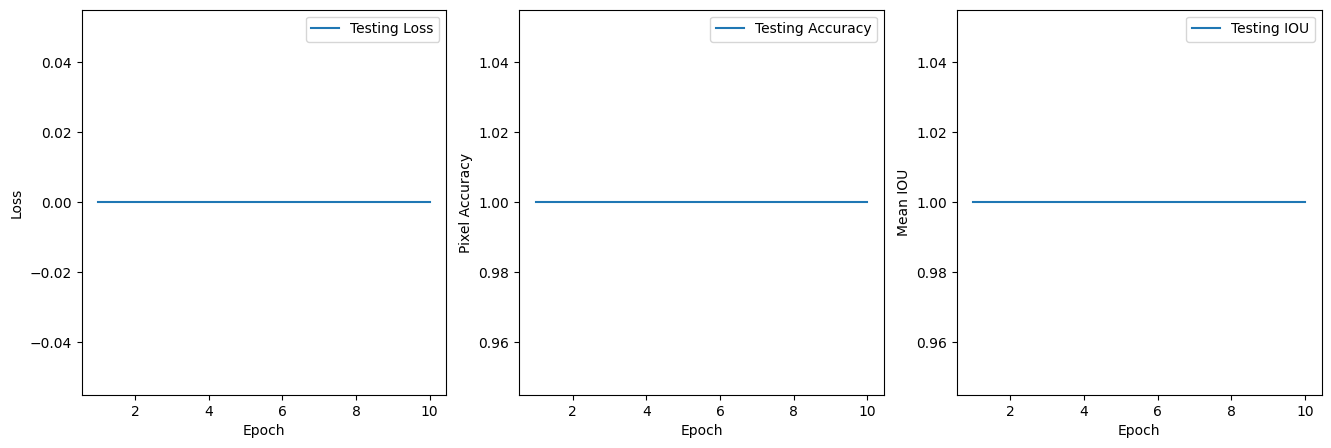

In [ ]:
#Test the model

n_epochs = 10
test_losses = []
test_accs = []
test_ious = []
for epoch in range(n_epochs):
    test_loss, test_acc, test_iou = validate(model, test_dataloader, criterion)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    test_ious.append(test_iou)
    print(f"Epoch {epoch+1}/{n_epochs}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}, Test IOU: {test_iou:.4f}")

#Plot the losses, accuracies and Jaccard scores
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, n_epochs+1), test_losses, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, n_epochs+1), test_accs, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Pixel Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, n_epochs+1), test_ious, label="Testing IOU")
plt.xlabel("Epoch")
plt.ylabel("Mean IOU")
plt.legend()

plt.show()


In [ ]:
###UNET###

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch.nn.functional as F
import time

# Build model

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
        
    def forward(self, x):
        return self.conv(x)
    
class UNet(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.down1 = DoubleConv(in_channels, 64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.down4 = DoubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.bottom = DoubleConv(512, 1024)
        self.up1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.up_conv1 = DoubleConv(1024, 512)
        self.up2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.up_conv2 = DoubleConv(512, 256)
        self.up3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.up_conv3 = DoubleConv(256, 128)
        self.up4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.up_conv4 = DoubleConv(128, 64)
        self.out = nn.Conv2d(64, num_classes, kernel_size=1)
        
    def forward(self, x):
        # Encoder
        x1 = self.down1(x)
        x2 = self.pool1(x1)
        x2 = self.down2(x2)
        x3 = self.pool2(x2)
        x3 = self.down3(x3)
        x4 = self.pool3(x3)
        x4 = self.down4(x4)
        x5 = self.pool4(x4)
        x5 = self.bottom(x5)
        # Decoder
        x = self.up1(x5)
        x = torch.cat([x, x4], dim=1)
        x = self.up_conv1(x)
        x = self.up2(x)
        x = torch.cat([x, x3], dim=1)
        x = self.up_conv2(x)
        x = self.up3(x)
        x = torch.cat([x, x2], dim=1)
        x = self.up_conv3(x)
        x = self.up4(x)
        x = torch.cat([x, x1], dim=1)
        x = self.up_conv4(x)
        out = self.out(x)
        return out

num_classes = 32
model = UNet(3, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [ ]:
# Use cross validation to find the best hyperparameters

from sklearn.model_selection import ParameterGrid

# Define the hyperparameters to tune and their possible values
param_grid = {
    'lr': [0.1, 0.01, 0.001],  # learning rate
    'weight_decay': [0.0, 0.1, 0.01],  # weight decay
    'batch_size': [16, 32], #batch
}

# Create a parameter grid
grid = ParameterGrid(param_grid)

best_model = None
best_loss = float('inf')
num_classes = 32
val_losses = []
val_accs = []
val_ious = []
# Iterate over each combination of hyperparameters
for params in grid:
    model = UNet(3, num_classes)  # Initialize a new model
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
    criterion = nn.CrossEntropyLoss()

    # Update the batch size
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

    n_epochs = 10
    train_losses = []
    train_accs = []
    train_ious = []
    val_losses = []
    val_accs = []
    val_ious = []
    for epoch in range(n_epochs):
        train_loss, train_acc, train_iou = train(model, train_dataloader, optimizer, criterion)
        val_loss, val_acc, val_iou = validate(model, val_dataloader, criterion)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        train_ious.append(train_iou)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_ious.append(val_iou)
        print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train IOU: {train_iou:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val IOU: {val_iou:.4f}")

    # If the new model is better than the previous best, update the best model
    if min(val_losses) < best_loss:
        best_loss = min(val_losses)
        best_model = model
        best_parameters = params

print("Best parameters: ", best_parameters)



In [ ]:
# Train the model

import time

n_epochs = 10
train_losses = []
train_accs = []
train_ious = []
val_losses = []
val_accs = []
val_ious = []
start_time = time.time() 
for epoch in range(n_epochs):
    train_loss, train_acc, train_iou = train(model, train_dataloader, optimizer, criterion)
    val_loss, val_acc, val_iou = validate(model, val_dataloader, criterion)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    train_ious.append(train_iou)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    val_ious.append(val_iou)
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train IOU: {train_iou:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val IOU: {val_iou:.4f}")
    
end_time = time.time()
epoch_time = end_time - start_time
print(f"Training time: {epoch_time:.2f}, seconds")

# Plot the losses, accuracies and Jaccard scores
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, n_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, n_epochs+1), train_accs, label="Training Accuracy")
plt.plot(range(1, n_epochs+1), val_accs, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Pixel Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, n_epochs+1), train_ious, label="Training IOU")
plt.plot(range(1, n_epochs+1), val_ious, label="Validation IOU")
plt.xlabel("Epoch")
plt.ylabel("Mean IOU")
plt.legend()

plt.show()


In [ ]:
# Test the model

n_epochs = 10
test_losses = []
test_accs = []
test_ious = []
for epoch in range(n_epochs):
    test_loss, test_acc, test_iou = validate(model, test_dataloader, criterion)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    test_ious.append(test_iou)
    print(f"Epoch {epoch+1}/{n_epochs}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}, Test IOU: {test_iou:.4f}")

# Plot the losses, accuracies and Jaccard scores
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, n_epochs+1), test_losses, label="Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, n_epochs+1), test_accs, label="Testing Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Pixel Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, n_epochs+1), test_ious, label="Testing IOU")
plt.xlabel("Epoch")
plt.ylabel("Mean IOU")
plt.legend()

plt.show()


In [ ]:
###PSPNET###

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

!unzip Cam101.zip

%cd Cam101

import os

train_folder = "train"
test_folder = "test"

# Get a list of all files in the train and test folders
train_list = os.listdir(train_folder)
test_list = os.listdir(test_folder)

# Count the number of image files
train_images = len([file for file in train_list if file.endswith(".png")])
test_images = len([file for file in test_list if file.endswith(".png")])

# Print the number of images
print(f"There are {train_images} images in the train folder.")
print(f"There are {test_images} images in the test folder.")


In [ ]:
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

train_folder = "train"
test_folder = "test"

train_list = os.listdir(train_folder)
train_images = len([file for file in train_list if file.endswith(".png")])
print(f"There are {train_images} images in the train folder.")

train_image_folder = "train_images"
train_label_folder = "train_labels"
test_image_folder = "test_images"
test_label_folder = "test_labels"

# remove contents of directories
shutil.rmtree(train_image_folder)
shutil.rmtree(train_label_folder)
shutil.rmtree(test_image_folder)
shutil.rmtree(test_label_folder)

# Create directories to store the split data
os.makedirs(train_image_folder, exist_ok=True)
os.makedirs(train_label_folder, exist_ok=True)
os.makedirs(test_image_folder, exist_ok=True)
os.makedirs(test_label_folder, exist_ok=True)

# Split the train images and labels into separate folders
for filename in os.listdir(os.path.join(train_folder)):
    if filename.endswith(".png"):
        if filename.endswith("_L.png"):
            print(f"Copying {filename} to {train_label_folder}")
            shutil.copy(os.path.join(train_folder, filename), os.path.join(train_label_folder, filename))
        else:
            print(f"Copying {filename} to {train_image_folder}")
            shutil.copy(os.path.join(train_folder, filename), os.path.join(train_image_folder, filename))

# Split the test images and labels into separate folders
for filename in os.listdir(os.path.join(test_folder)):
    if filename.endswith(".png"):
        if filename.endswith("_L.png"):
            print(f"Copying {filename} to {test_label_folder}")
            shutil.copy(os.path.join(test_folder, filename), os.path.join(test_label_folder, filename))
        else:
            print(f"Copying {filename} to {test_image_folder}")
            shutil.copy(os.path.join(test_folder, filename), os.path.join(test_image_folder, filename))


train_images_list = os.listdir(train_image_folder)
train_labels_list = os.listdir(train_label_folder)

print("Number of train images:", len(train_images_list))
print("Number of train labels:", len(train_labels_list))
print("Number of test images:", len(os.listdir(test_image_folder)))
print("Number of test labels:", len(os.listdir(test_label_folder)))

# Select a random index to display the images
index = np.random.randint(len(train_images_list))

# Load the train and train label images
train_image = Image.open(os.path.join(train_image_folder, train_images_list[index]))
train_label = Image.open(os.path.join(train_label_folder, train_labels_list[index]))

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(train_image)
axes[0].set_title("Train Image")
axes[1].imshow(train_label)
axes[1].set_title("Train Label")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
# Load the original train image and train label
original_train_image = Image.open(os.path.join(train_image_folder, train_images_list[index]))
original_train_label = Image.open(os.path.join(train_label_folder, train_labels_list[index]))

# Define the transforms for your test dataset
transform = transforms.Compose([
    transforms.Resize((480, 360)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# Apply data augmentation to the train image and train label
augmented_train_image = transform(original_train_image)
augmented_train_label = transform(original_train_label)

# Convert the augmented train image and train label to NumPy arrays
augmented_train_image = augmented_train_image.permute(1, 2, 0).numpy()
augmented_train_label = augmented_train_label.permute(1, 2, 0).numpy()

# Visualize the original and augmented images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(original_train_image)
axes[0, 0].set_title("Original Train Image")
axes[0, 1].imshow(original_train_label)
axes[0, 1].set_title("Original Train Label")
axes[1, 0].imshow(augmented_train_image)
axes[1, 0].set_title("Augmented Train Image")
axes[1, 1].imshow(augmented_train_label)
axes[1, 1].set_title("Augmented Train Label")
plt.show()


In [ ]:
color_class_map = {
    (64, 128, 64): "Animal",
    (192, 0, 128): "Archway",
    (0, 128, 192): "Bicyclist",
    (0, 128, 64): "Bridge",
    (128, 0, 0): "Building",
    (64, 0, 128): "Car",
    (64, 0, 192): "CartLuggagePram",
    (192, 128, 64): "Child",
    (192, 192, 128): "Column_Pole",
    (64, 64, 128): "Fence",
    (128, 0, 192): "LaneMkgsDriv",
    (192, 0, 64): "LaneMkgsNonDriv",
    (128, 128, 64): "Misc_Text",
    (192, 0, 192): "MotorcycleScooter",
    (128, 64, 64): "OtherMoving",
    (64, 192, 128): "ParkingBlock",
    (64, 64, 0): "Pedestrian",
    (128, 64, 128): "Road",
    (128, 128, 192): "RoadShoulder",
    (0, 0, 192): "Sidewalk",
    (192, 128, 128): "SignSymbol",
    (128, 128, 128): "Sky",
    (64, 128, 192): "SUVPickupTruck",
    (0, 0, 64): "TrafficCone",
    (0, 64, 64): "TrafficLight",
    (192, 64, 128): "Train",
    (128, 128, 0): "Tree",
    (192, 128, 192): "Truck_Bus",
    (64, 0, 64): "Tunnel",
    (192, 192, 0): "VegetationMisc",
    (0, 0, 0): "Void",
    (64, 192, 0): "Wall"
}


In [ ]:
import os
import torch
import torch.nn as nn
from PIL import Image
from torchvision import transforms
import cv2

class_names = []
for rgb_values, class_name in color_class_map.items():
    class_names.append(class_name)

# Define the image size
image_size = (480, 360)  # Reduce the image size to 480x360

# Define the data preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize(image_size),  # Resize to desired input size
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Load original and labeled images with preprocessing
train_images_resized = []
train_labels_resized = []

for file_name in train_images_list:
    # Load and preprocess original image
    original_path = os.path.join(train_image_folder, file_name)
    original_image = Image.open(original_path).convert("RGB")
    preprocessed_image = preprocess(original_image)
    train_images_resized.append(preprocessed_image)

for file_name in train_labels_list:
    # Load and preprocess labeled image
    original_path = os.path.join(train_label_folder, file_name)
    original_label = Image.open(original_path).convert("RGB")
    # Convert labeled image to numpy array
    label_array = np.array(original_label)
    # Create an empty preprocessed label array
    preprocessed_label = np.zeros(image_size, dtype=np.int64)
    # Map RGB values to class labels using NumPy operations
    rgb_values = label_array[:, :, ::-1]  # Convert RGB to BGR
    class_indices = np.zeros(rgb_values.shape[:2], dtype=np.int64)
    
    for rgb, class_index in color_class_map.items():
        mask = np.all(rgb_values == np.array(rgb), axis=2)
        class_indices[mask] = class_names.index(class_index)
    
    # Resize class_indices to match the shape of preprocessed_label
    class_indices_resized = cv2.resize(class_indices, image_size[::-1], interpolation=cv2.INTER_NEAREST).astype(np.int64)
    preprocessed_label = torch.from_numpy(class_indices_resized.astype(np.int64))
    train_labels_resized.append(preprocessed_label)



# Convert the lists to tensors
train_images_resized = torch.stack(train_images_resized)
train_labels_resized = torch.stack(train_labels_resized)

# Print the sizes of train images and labels
print("Size of train images:", train_images_resized.size())
print("Size of train labels:", train_labels_resized.size())
print(torch.unique(train_labels_resized))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from segmentation_models_pytorch import PSPNet
import segmentation_models_pytorch as smp
from sklearn.model_selection import train_test_split
from torch.optim import lr_scheduler

# Define the data augmentation transformations for images
augmentation_images = transforms.Compose([
    transforms.RandomCrop(720, 720),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
    transforms.Resize(image_size),
])

# Define the data augmentation transformations for labels
augmentation_labels = transforms.Compose([
    transforms.RandomCrop(720, 720),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.Resize(image_size, interpolation=Image.NEAREST),
])

# Apply data augmentation to the train images and labels
augmented_train_images = [augmentation_images(image) for image in train_images_resized]
augmented_train_labels = [augmentation_labels(label.unsqueeze(0)).squeeze(0) for label in train_labels_resized]

# Convert the augmented train images and labels to tensors
augmented_train_images = torch.stack(augmented_train_images)
augmented_train_labels = torch.stack(augmented_train_labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(augmented_train_images, augmented_train_labels, test_size=0.1, random_state=42)

# Define batch size
batch_size = 5

# Training dataset
train_dataset = torch.utils.data.TensorDataset(torch.stack([x for x in X_train]), torch.stack([y for y in y_train]))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Validation dataset
val_dataset = torch.utils.data.TensorDataset(torch.stack([x for x in X_val]), torch.stack([y for y in y_val]))

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
num_classes = 32

class PSPNet(nn.Module):
    def __init__(self, num_classes):
        super(PSPNet, self).__init__()

        # Load the pretrained ResNet as the backbone
        self.backbone = models.resnet50(pretrained=True)
        
        # Remove the fully connected layer
        self.backbone.fc = nn.Identity()
        
        # Modify the number of output channels in layer3
        self.backbone.layer3 = nn.Sequential(
            *list(self.backbone.layer3.children())[:-1],  # Remove the last layer
            nn.Conv2d(1024, 2048, kernel_size=1),
            nn.BatchNorm2d(2048),
            nn.ReLU(inplace=True),
        )
        
        # Define the pyramid pooling module
        self.pyramid_pooling = PSPModule(2048, 256, (1, 2, 3, 6))

        # Define the final classification layer
        self.final_conv = nn.Conv2d(256 + 2048, num_classes, kernel_size=1)  # Update the input channels for final_conv

    def forward(self, x):
      # Backbone feature extraction
      c1 = self.backbone.conv1(x)
      c1 = self.backbone.bn1(c1)
      c1 = self.backbone.relu(c1)
      c1 = self.backbone.maxpool(c1)
      c2 = self.backbone.layer1(c1)
      c3 = self.backbone.layer2(c2)
      c4 = self.backbone.layer3(c3)

      # Pyramid pooling module
      p = self.pyramid_pooling(c4)

      # Upsampling and concatenation
      target_size = c4.size()[2:]  # Get the spatial size of c4
      p = nn.functional.interpolate(p, size=target_size, mode='bilinear', align_corners=False)
      x = torch.cat([p, c4], dim=1)

      # Final classification
      x = self.final_conv(x)

      # Resize the output tensor to match the input spatial size
      x = nn.functional.interpolate(x, size=x.size()[2:], mode='bilinear', align_corners=False)

      return x



# PSP module for pyramid pooling
class PSPModule(nn.Module):
    def __init__(self, in_channels, out_channels, scales):
        super(PSPModule, self).__init__()

        self.layers = nn.ModuleList()
        for scale in scales:
            self.layers.append(nn.Sequential(
                nn.AdaptiveAvgPool2d(scale),
                nn.Conv2d(in_channels, out_channels, kernel_size=1),
                nn.ReLU(inplace=True)
            ))
        self.conv_final = nn.Conv2d(in_channels + out_channels * len(scales), out_channels, kernel_size=1)

    def forward(self, x):
        features = [layer(x) for layer in self.layers]
        features.append(nn.functional.adaptive_avg_pool2d(x, (1, 1)))
        features = [nn.functional.interpolate(feat, size=x.size()[2:], mode='bilinear', align_corners=False)
                    for feat in features]
        features = torch.cat(features, dim=1)
        return self.conv_final(features)





In [ ]:
from segmentation_models_pytorch.encoders import TimmUniversalEncoder
import torchvision.models as models

def get_encoder(name, in_channels=3, depth=5, weights=None, output_stride=32, **kwargs):
    if isinstance(name, int):
        name = str(name)

    if name.startswith("tu-"):
        name = name[3:]
        encoder = TimmUniversalEncoder(...)
        # Rest of the code
    else:
        raise ValueError("Unrecognized encoder name: {}".format(name))

    return encoder

# Set device (CPU or GPU)
device = torch.device("cpu")

# Specify the encoder name
encoder_name = "tu-resnet34"

# Create an instance of the PSPNet model with the specified encoder
model = PSPNet(num_classes)

# Move the model to the appropriate device
model.to(device)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for images, labels in train_loader:
    print("Images shape:", images.size())  # Check the shape of the images tensor
    print("Labels shape:", labels.size())  # Check the shape of the labels tensor
    break  # Print the shapes of the first batch only


for images, labels in val_loader:
    print("Val Images shape:", images.size())  # Check the shape of the images tensor
    print("Val Labels shape:", labels.size())  # Check the shape of the labels tensor
    break  # Print the shapes of the first batch only

In [ ]:
#with calculated mean iou
import torch
import torch.nn as nn
import torchvision.models as models
from segmentation_models_pytorch import PSPNet
from torch.optim import lr_scheduler
# from torch.cuda.amp import autocast, GradScaler
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

def pixel_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct_pixels = torch.sum(predicted == labels)
    total_pixels = labels.numel()
    accuracy = float(correct_pixels) / float(total_pixels)
    return accuracy

def calculate_mean_iou(outputs, labels, threshold=0.5):
    _, predicted = torch.max(outputs, 1)
    predicted = (predicted > threshold).float()
    labels = (labels > threshold).float()
    intersection = torch.sum(predicted * labels)
    union = torch.sum((predicted + labels) > 0)
    iou = intersection / (union + 1e-7)
    return iou.item()

def train(train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0
    running_iou = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.squeeze(1).long().to(device)
        optimizer.zero_grad()

        # Check input image size
        if images.size()[2:] != (480, 360):
            raise ValueError("Invalid image size. Expected size is (480, 360).")


        outputs = model(images)

        # Check output size
        if outputs.size()[2:] != (30, 23):
            raise ValueError("Invalid output size. Expected size is (30, 23).")

        # Resize both the output tensor and the target labels
        target_size = images.size()[2:]  # Get the spatial size of the input images
        outputs = nn.functional.interpolate(outputs, size=target_size, mode='bilinear', align_corners=False)
        labels = nn.functional.interpolate(labels.float().unsqueeze(1), size=target_size, mode='nearest').long().squeeze(1)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_accuracy += pixel_accuracy(outputs, labels)
        running_iou += calculate_mean_iou(outputs, labels)
        
        print(f"Train - Image size: {images.size()}, Label size: {labels.size()}")

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = running_accuracy / len(train_loader)
    epoch_iou = running_iou / len(train_loader)
    return epoch_loss, epoch_accuracy, epoch_iou


def validate(val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_accuracy = 0.0
    running_iou = 0.0
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            images = images.to(device)
            labels = labels.squeeze(1).long().to(device)

            # Check input image size
            if images.size()[2:] != (480, 360):
                raise ValueError("Invalid image size. Expected size is (480, 360).")

            outputs = model(images)
            outputs = nn.functional.interpolate(outputs, size=labels.size()[1:], mode='bilinear', align_corners=False)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            running_accuracy += pixel_accuracy(outputs, labels)
            running_iou += calculate_mean_iou(outputs, labels)
            
            print(f"Validation - Image size: {images.size()}, Label size: {labels.size()}")

    epoch_loss = running_loss / len(val_loader)
    epoch_accuracy = running_accuracy / len(val_loader)
    epoch_iou = running_iou / len(val_loader)
    return epoch_loss, epoch_accuracy, epoch_iou

n_epochs = 10
train_losses = []
train_accs = []
train_ious = []
val_losses = []
val_accs = []
val_ious = []
num_classes = 32 
 

for epoch in range(n_epochs):
    train_loss = 0.0
    train_accuracy = 0.0
    train_iou = 0.0
    
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.squeeze(1).long().to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        
        # Resize the output tensor to match the size of the target labels
        target_size = labels.size()[1:]
        outputs = nn.functional.interpolate(outputs, size=target_size, mode='bilinear', align_corners=False)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_accuracy += pixel_accuracy(outputs, labels)
        train_iou += calculate_mean_iou(outputs, labels)
    
    epoch_train_loss = train_loss / len(train_loader)
    epoch_train_accuracy = train_accuracy / len(train_loader)
    epoch_train_iou = train_iou / len(train_loader)
    
    val_loss, val_accuracy, val_iou = validate(val_loader, criterion)
    
    train_losses.append(epoch_train_loss)
    train_accs.append(epoch_train_accuracy)
    train_ious.append(epoch_train_iou)
    val_losses.append(val_loss)
    val_accs.append(val_accuracy)
    val_ious.append(val_iou)
    
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.4f}, Train IoU: {epoch_train_iou:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val IoU: {val_iou:.4f}")


In [ ]:
import time
from sklearn.metrics import jaccard_score
import torchvision.models as models
from segmentation_models_pytorch import PSPNet
from torch.optim import lr_scheduler
import torch
import torch.nn as nn
import torchvision.models as models
from segmentation_models_pytorch import PSPNet
from torch.optim import lr_scheduler

import torch
import torch.nn as nn
from torch import optim
from sklearn.metrics import jaccard_score

# Define the model, criterion, and optimizer
model = PSPNet('resnet34', encoder_weights=None, classes=32)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

def pixel_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct_pixels = torch.sum(predicted == labels)
    total_pixels = labels.numel()
    accuracy = float(correct_pixels) / float(total_pixels)
    return accuracy

def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0
    running_jaccard = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.squeeze(1).long().to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        accuracy = pixel_accuracy(outputs, labels)
        predictions_flat = outputs.argmax(dim=1).flatten().cpu().numpy()
        labels_flat = labels.flatten().cpu().numpy()
        iou = jaccard_score(labels_flat, predictions_flat, average='micro')
        running_loss += loss.item()
        running_accuracy += accuracy
        running_jaccard += iou
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = running_accuracy / len(train_loader)
    epoch_jaccard = running_jaccard / len(train_loader)
    return epoch_loss, epoch_accuracy, epoch_jaccard

def validate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_accuracy = 0.0
    running_jaccard = 0.0
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            images = images.to(device)
            labels = labels.squeeze(1).long().to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            accuracy = pixel_accuracy(outputs, labels)
            predictions_flat = outputs.argmax(dim=1).flatten().cpu().numpy()
            labels_flat = labels.flatten().cpu().numpy()
            iou = jaccard_score(labels_flat, predictions_flat, average='micro')
            running_loss += loss.item()
            running_accuracy += accuracy
            running_jaccard += iou
    epoch_loss = running_loss / len(val_loader)
    epoch_accuracy = running_accuracy / len(val_loader)
    epoch_jaccard = running_jaccard / len(val_loader)
    return epoch_loss, epoch_accuracy, epoch_jaccard

n_epochs = 10
train_losses = []
train_accs = []
train_mious = []
val_losses = []
val_accs = []
val_mious = []
for epoch in range(n_epochs):
    train_loss, train_acc, train_miou = train(model, train_loader, optimizer, criterion)
    val_loss, val_acc, val_miou = validate(model, val_loader, criterion)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    train_mious.append(train_miou)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    val_mious.append(val_miou)

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train MIOU: {train_miou:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val MIOU: {val_miou:.4f}")
    

In [ ]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    }, 'modelv1_checkpoint.pth')


In [ ]:
import matplotlib.pyplot as plt

# Plot the losses, accuracies, and IoU
plt.figure(figsize=(15, 5))  # Increase the figure size to accommodate the subplots

plt.subplot(1, 3, 1)
plt.plot(range(1, n_epochs+1), train_losses, label="Training Loss")
plt.plot(range(1, n_epochs+1), val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, n_epochs+1), train_accs, label="Training Accuracy")
plt.plot(range(1, n_epochs+1), val_accs, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Pixel Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, n_epochs+1), train_mious, label="Training IoU")
plt.plot(range(1, n_epochs+1), val_mious, label="Validation IoU")
plt.xlabel("Epoch")
plt.ylabel("IoU")
plt.legend()

plt.tight_layout()  # Automatically adjust subplot spacing

plt.show()



In [ ]:
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
n_folds = 5

criterion = nn.CrossEntropyLoss()

# Perform cross-validation
kf = KFold(n_splits=n_folds, shuffle=True)

fold_train_losses = []
fold_train_accs = []
fold_train_ious = []
fold_val_losses = []
fold_val_accs = []
fold_val_ious = []

criterion = nn.CrossEntropyLoss()

num_classes = 32 
n_epochs = 10

kf = KFold(n_splits=n_folds, shuffle=True)

for fold, (train_indices, val_indices) in enumerate(kf.split(train_dataset)):
    # Create the data loaders for training and validation for the current fold
    train_subset = torch.utils.data.Subset(train_dataset, train_indices)
    val_subset = torch.utils.data.Subset(train_dataset, val_indices)

    train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    model = PSPNet(num_classes)
    model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    epoch_train_losses = []
    epoch_train_accs = []
    epoch_train_ious = []
    epoch_val_losses = []
    epoch_val_accs = []
    epoch_val_ious = []

    for epoch in range(n_epochs):
        train_loss = 0.0
        train_accuracy = 0.0
        train_iou = 0.0

        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.squeeze(1).long().to(device)
            optimizer.zero_grad()

            outputs = model(images)

            target_size = labels.size()[1:]
            outputs = nn.functional.interpolate(outputs, size=target_size, mode='bilinear', align_corners=False)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_accuracy += pixel_accuracy(outputs, labels)
            predictions_flat = outputs.argmax(dim=1).flatten().cpu().numpy()
            labels_flat = labels.flatten().cpu().numpy()
            iou = jaccard_score(labels_flat, predictions_flat, average='micro')
            train_iou += iou


        epoch_train_loss = train_loss / len(train_loader)
        epoch_train_accuracy = train_accuracy / len(train_loader)
        epoch_train_iou = train_iou / len(train_loader)

        epoch_val_loss, epoch_val_accuracy, epoch_val_iou = validate(model, val_loader, criterion)

        epoch_train_losses.append(epoch_train_loss)
        epoch_train_accs.append(epoch_train_accuracy)
        epoch_train_ious.append(epoch_train_iou)
        epoch_val_losses.append(epoch_val_loss)
        epoch_val_accs.append(epoch_val_accuracy)
        epoch_val_ious.append(epoch_val_iou)

        print(f"Fold {fold+1}/{n_folds}, Epoch {epoch+1}/{n_epochs}, Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy:.4f}, Val IoU: {epoch_val_iou:.4f}")

    fold_train_losses.append(epoch_train_losses)
    fold_train_accs.append(epoch_train_accs)
    fold_train_ious.append(epoch_train_ious)
    fold_val_losses.append(epoch_val_losses)
    fold_val_accs.append(epoch_val_accs)
    fold_val_ious.append(epoch_val_ious)

# Check the size and structure of validation dataset
val_dataset_size = len(val_dataset)
val_indices = np.concatenate([val_indices for _, val_indices in kf.split(train_dataset)])
if val_dataset_size < len(val_indices):
    print("Warning: The validation dataset contains fewer samples than the number of indices used in KFold.")
elif val_dataset_size > len(val_indices):
    print("Warning: The validation dataset contains more samples than the number of indices used in KFold.")

# Compute the average evaluation metrics across all folds
average_train_loss = sum([sum(losses) for losses in fold_train_losses]) / len(fold_train_losses)
average_train_accuracy = sum([sum(accs) for accs in fold_train_accs]) / len(fold_train_accs)
average_train_iou = sum([sum(ious) for ious in fold_train_ious]) / len(fold_train_ious)
average_val_loss = sum([sum(losses) for losses in fold_val_losses]) / len(fold_val_losses)
average_val_accuracy = sum([sum(accs) for accs in fold_val_accs]) / len(fold_val_accs)
average_val_iou = sum([sum(ious) for ious in fold_val_ious]) / len(fold_val_ious)


# Print the average evaluation metrics
print(f"Average Train Loss: {average_train_loss:.4f}, Average Train Accuracy: {average_train_accuracy:.4f}, Average Train IoU: {average_train_iou:.4f}")
print(f"Average Val Loss: {average_val_loss:.4f}, Average Val Accuracy: {average_val_accuracy:.4f}, Average Val IoU: {average_val_iou:.4f}")


In [ ]:
from sklearn.model_selection import ParameterGrid
# Define the hyperparameters to tune and their possible values
param_grid = {
    'lr': [0.1, 0.01, 0.001],  # learning rate
    'weight_decay': [0.0, 0.1, 0.01],  # weight decay
    'batch_size': [16, 32], #batch
}

# Create a parameter grid
grid = ParameterGrid(param_grid)

best_model = None
best_loss = float('inf')
num_classes = 32

# Iterate over each combination of hyperparameters
for params in grid:
    model = PSPNet('resnet34', encoder_weights=None, classes=num_classes)  # Initialize a new model
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])
    criterion = nn.CrossEntropyLoss()  # Or your loss function

    # Update the batch size
    train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

    train_losses = []
    train_accs = []
    train_mious = []
    val_losses = []
    val_accs = []
    val_mious = []

    for epoch in range(n_epochs):
        train_loss, train_acc, train_miou = train(model, train_loader, optimizer, criterion)
        val_loss, val_acc, val_miou = validate(model, val_loader, criterion)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        train_mious.append(train_miou)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_mious.append(val_miou)

        print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train MIOU: {train_miou:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val MIOU: {val_miou:.4f}")
    
    # If the new model is better than the previous best, update the best model
    if min(val_losses) < best_loss:
        best_loss = min(val_losses)
        best_model = model
        best_parameters = params


In [ ]:
print("Best parameters: ", best_parameters)


In [ ]:
import cv2
test_images_list = os.listdir(test_image_folder)
test_labels_list = os.listdir(test_label_folder)

index = 0
original_test_image = Image.open(os.path.join(test_image_folder, test_images_list[index]))
original_test_label = Image.open(os.path.join(test_label_folder, test_labels_list[index]))


class_names = []
for rgb_values, class_name in color_class_map.items():
    class_names.append(class_name)

# Define batch size
batch_size = 5

# Define the image size
image_size = (473, 473)  # Reduce the image size to 30x23

# Define the data preprocessing transformations
preprocess = transforms.Compose([
    transforms.Resize(image_size),  # Resize to desired input size
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

# Load original and labeled images with preprocessing
test_images_resized = []
test_labels_resized = []

for file_name in test_images_list:
    # Load and preprocess original image
    originalt_path = os.path.join(test_image_folder, file_name)
    originalt_image = Image.open(originalt_path).convert("RGB")
    preprocessed_imaget = preprocess(originalt_image)
    test_images_resized.append(preprocessed_imaget)

for file_name in test_labels_list:
    # Load and preprocess labeled image
    original_patht = os.path.join(test_label_folder, file_name)
    original_labelt = Image.open(original_patht).convert("RGB")
    # Convert labeled image to numpy array
    labelt_array = np.array(original_labelt)
    # Map RGB values to class labels using NumPy operations
    rgb_values = labelt_array[:, :, ::-1]  # Convert RGB to BGR
    class_indices = np.zeros(rgb_values.shape[:2], dtype=np.int64)
    
    for rgb, class_index in color_class_map.items():
        mask = np.all(rgb_values == np.array(rgb), axis=2)
        class_indices[mask] = class_names.index(class_index)
    
    # Resize class_indices to match the shape of preprocessed_label
    class_indices_resized = cv2.resize(class_indices, image_size[::-1], interpolation=cv2.INTER_NEAREST).astype(np.int64)
    preprocessed_label = torch.from_numpy(class_indices_resized.astype(np.int64))
    test_labels_resized.append(preprocessed_label)

# Convert the lists to tensors
test_images_resized = torch.stack(test_images_resized)
test_labels_resized = torch.stack(test_labels_resized)

# Define batch size
batch_size = 5

# Test dataset
test_dataset = torch.utils.data.TensorDataset(test_images_resized, test_labels_resized)

# Test DataLoader
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
import matplotlib.pyplot as plt
#display a sample batch of test images
num_images = 5

# Loop through the preprocessed test dataset and plot the images
for i in range(num_images):
    # Get the preprocessed test image and label
    preprocessed_test_image = test_images_resized[i]
    preprocessed_test_label = test_labels_resized[i]

    # Convert the preprocessed test image and label to numpy arrays
    preprocessed_test_image = preprocessed_test_image.permute(1, 2, 0).numpy()
    preprocessed_test_label = preprocessed_test_label.numpy()

    # Plot the preprocessed test image and label
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(preprocessed_test_image)
    axes[0].set_title("Preprocessed Test Image")
    axes[0].axis("off")
    axes[1].imshow(preprocessed_test_label, cmap="jet")
    axes[1].set_title("Preprocessed Test Label")
    axes[1].axis("off")
    plt.show()


In [ ]:
#random test image 
index = np.random.randint(len(test_dataset))

# Get the original test image and label
original_test_image = Image.open(os.path.join(test_image_folder, test_images_list[index]))
original_test_label = Image.open(os.path.join(test_label_folder, test_labels_list[index]))

# Plot the original test image and label
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_test_image)
axes[0].set_title("Original Test Image")
axes[0].axis("off")
axes[1].imshow(original_test_label)
axes[1].set_title("Original Test Label")
axes[1].axis("off")
plt.show()

# Get the preprocessed test image and label
preprocessed_test_image = test_images_resized[index].permute(1, 2, 0).numpy()
preprocessed_test_label = test_labels_resized[index]

# Plot the preprocessed test image and label
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(preprocessed_test_image)
axes[0].set_title("Preprocessed Test Image")
axes[0].axis("off")
axes[1].imshow(preprocessed_test_label, cmap="jet")
axes[1].set_title("Preprocessed Test Label")
axes[1].axis("off")
plt.show()



In [ ]:

for i in range(5):
    image, label = test_dataset[i]  # Get a sample image and label
    print(f"Sample {i+1}: Image size: {image.size()}, Label size: {label.size()}")

class_indices = label.unique().to(torch.int64).tolist()

class_names_assigned = [class_names[idx] for idx in class_indices]
print(f"Class indices: {class_indices}")
print(f"Class names assigned: {class_names_assigned}")


In [ ]:
import time
from sklearn.metrics import jaccard_score
import torchvision.models as models
from segmentation_models_pytorch import PSPNet
from torch.optim import lr_scheduler
import torch.nn.functional as F

batch_size = 16

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay= 0.01)  # L2 regularization


# Define the learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

checkpoint = torch.load('modelv1_checkpoint.pth')

# Load the model state_dict
model.load_state_dict(checkpoint['model_state_dict'])

# Create an instance of the optimizer
optimizer = torch.optim.Adam(model.parameters())

# Load the optimizer state_dict
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


# Define your criterion and optimizer with the best hyperparameters
criterion = nn.CrossEntropyLoss()

def pixel_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct_pixels = torch.sum(predicted == labels)
    total_pixels = labels.numel()
    accuracy = float(correct_pixels) / float(total_pixels)
    return accuracy


def test(test_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    running_accuracy = 0.0
    running_iou = 0.0
    with torch.no_grad():  # Disable gradient calculations
        for i, (images, labels) in enumerate(test_loader):
            images = images.to(device)
            labels = labels.squeeze(1).long().to(device)

            # Calculate padding to make the image size divisible by 8
            h, w = images.shape[2:]
            pad_height = (8 - h % 8) % 8
            pad_width = (8 - w % 8) % 8

            # Pad the input images
            images = F.pad(images, (0, pad_width, 0, pad_height), mode='constant', value=0)

            outputs = model(images)

            # Resize the output tensor to match the size of the target labels
            target_size = labels.size()[1:]
            outputs = nn.functional.interpolate(outputs, size=target_size, mode='bilinear', align_corners=False)

            # Ensure the labels tensor has the correct shape
            labels = labels.squeeze(1)  # Remove the singleton dimension

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            running_accuracy += pixel_accuracy(outputs, labels)

            # Flatten the predictions and labels arrays for IoU calculation
            predictions_flat = outputs.argmax(dim=1).flatten().cpu().numpy()
            labels_flat = labels.flatten().cpu().numpy()

            # Compute the IoU metric using jaccard_score
            iou = jaccard_score(labels_flat, predictions_flat, average='micro')
            running_iou += iou

            print(f"Test - Image size: {images.size()}, Label size: {labels.size()}, IoU: {iou}")

    test_loss = running_loss / len(test_loader)
    test_accuracy = running_accuracy / len(test_loader)
    test_iou = running_iou / len(test_loader)

    return test_loss, test_accuracy, test_iou



start_time = time.time()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

n_epochs = 10
test_losses = []
test_accs = []
test_ious = []

for epoch in range(n_epochs):
    test_loss, test_accuracy, test_iou = test(test_loader, criterion)

    test_losses.append(test_loss)
    test_accs.append(test_accuracy)
    test_ious.append(test_iou) 

    print(f"Epoch {epoch+1}/{n_epochs}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test IoU: {test_iou:.4f}")

end_time = time.time()

print(f"Average Test Loss: {np.mean(test_losses):.4f}, Average Test Accuracy: {np.mean(test_accs):.4f}, Average Test IoU: {np.mean(test_ious):.4f}")
print(f"Total testing time: {end_time - start_time:.2f} seconds")

In [ ]:
plt.figure(figsize=(15, 5))  # Increase the figure size to accommodate the subplots

plt.subplot(1, 3, 1)
plt.plot(range(1, n_epochs+1), test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(1, n_epochs+1), test_accs, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, n_epochs+1), test_ious, label="Test IoU")
plt.xlabel("Epoch")
plt.ylabel("IoU")
plt.legend()

plt.tight_layout()  # Automatically adjust subplot spacing

plt.show()

In [ ]:
import time


weight_decay = 0.01
batch_size = 16

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 regularization


# Define the learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

checkpoint = torch.load('modelv1_checkpoint.pth')

# Load the model state_dict
model.load_state_dict(checkpoint['model_state_dict'])

# Create an instance of the optimizer
optimizer = torch.optim.Adam(model.parameters())

# Load the optimizer state_dict
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])


# Define your criterion and optimizer with the best hyperparameters
criterion = nn.CrossEntropyLoss()

def pixel_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct_pixels = torch.sum(predicted == labels)
    total_pixels = labels.numel()
    accuracy = float(correct_pixels) / float(total_pixels)
    return accuracy
n_folds = 5  # Number of folds for cross-validation
kf = KFold(n_splits=n_folds, shuffle=True)

test_losses = []
test_accs = []
test_ious = []
eval_times = []

for epoch in range(n_epochs):
    fold_test_losses = []
    fold_test_accs = []
    fold_test_ious = []
    fold_eval_times = []

    for fold, (train_indices, val_indices) in enumerate(kf.split(test_dataset)):
        # Create the data loader for the current fold
        test_subset = torch.utils.data.Subset(test_dataset, val_indices)
        test_loader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=False)

        model.eval()
        test_loss = 0.0
        test_accuracy = 0.0
        test_iou = 0.0

        start_time = time.time()
        with torch.no_grad():  # Disable gradient calculations
            for i, (images, labels) in enumerate(test_loader):
                images = images.to(device)
                labels = labels.squeeze(1).long().to(device)

                # Calculate padding to make the image size divisible by 8
                h, w = images.shape[2:]
                pad_height = (8 - h % 8) % 8
                pad_width = (8 - w % 8) % 8

                # Pad the input images
                images = F.pad(images, (0, pad_width, 0, pad_height), mode='constant', value=0)

                outputs = model(images)

                # Resize the output tensor to match the size of the target labels
                target_size = labels.size()[1:]
                outputs = nn.functional.interpolate(outputs, size=target_size, mode='bilinear', align_corners=False)

                loss = criterion(outputs, labels)

                test_loss += loss.item()
                test_accuracy += pixel_accuracy(outputs, labels)
                test_iou += calculate_mean_iou(outputs, labels)
                # Flatten the predictions and labels arrays for IoU calculation
                predictions_flat = outputs.argmax(dim=1).flatten().cpu().numpy()
                labels_flat = labels.flatten().cpu().numpy()

                # Compute the IoU metric using jaccard_score
                iou = jaccard_score(labels_flat, predictions_flat, average='micro')
                test_iou += iou

        end_time = time.time()
        eval_time = end_time - start_time

        test_loss /= len(test_loader)
        test_accuracy /= len(test_loader)
        test_iou /= len(test_loader)

        fold_test_losses.append(test_loss)
        fold_test_accs.append(test_accuracy)
        fold_test_ious.append(test_iou)
        fold_eval_times.append(eval_time)

    # Compute the average evaluation metrics across all folds for the current epoch
    average_test_loss = sum(fold_test_losses) / len(fold_test_losses)
    average_test_accuracy = sum(fold_test_accs) / len(fold_test_accs)
    average_test_iou = sum(fold_test_ious) / len(fold_test_ious)
    average_eval_time = sum(fold_eval_times) / len(fold_eval_times)

    test_losses.append(average_test_loss)
    test_accs.append(average_test_accuracy)
    test_ious.append(average_test_iou)
    eval_times.append(average_eval_time)

    # Print the evaluation metrics for the current epoch
    print(f"Epoch {epoch+1}/{n_epochs}, Average Test Loss: {average_test_loss:.4f}, Average Test Accuracy: {average_test_accuracy:.4f}, Average Test IoU: {average_test_iou:.4f}, Average Eval Time: {average_eval_time:.2f} seconds")

# Compute the overall average evaluation metrics across all epochs
overall_average_test_loss = sum(test_losses) / len(test_losses)
overall_average_test_accuracy = sum(test_accs) / len(test_accs)
overall_average_test_iou = sum(test_ious) / len(test_ious)
overall_average_eval_time = sum(eval_times) / len(eval_times)

# Print the overall average evaluation metrics
print(f"Overall Average Test Loss: {overall_average_test_loss:.4f}, Overall Average Test Accuracy: {overall_average_test_accuracy:.4f}, Overall Average Test IoU: {overall_average_test_iou:.4f}, Overall Average Eval Time: {overall_average_eval_time:.2f} seconds")
